<a href="https://colab.research.google.com/github/sun-fox/GluonCV-Mxnet/blob/master/CNN_with_Gluon_Blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mxnet-cu101mkl
!pip install gluoncv

     |████████████████████████████████| 711.0MB 24kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 757kB 8.4MB/s 


In [0]:
import mxnet as mx
from mxnet import nd
from mxnet.gluon import nn

In [4]:
layer = nn.Conv2D(
    channels=1,
    kernel_size=(3,3),
    strides=(1, 1), 
    padding=(0, 0), 
    activation='relu',
    in_channels=1,
    prefix='conv_'
)

layer

Conv2D(1 -> 1, kernel_size=(3, 3), stride=(1, 1), Activation(relu))

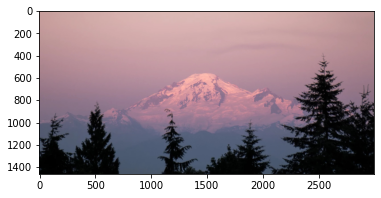

In [7]:
import gluoncv as gcv
import matplotlib.pyplot as plt
image_url = "https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/mt_baker.jpg"
image_filepath = 'mt_baker.jpg'
gcv.utils.download(url=image_url, path=image_filepath)
o = plt.imshow(plt.imread('mt_baker.jpg'))

In [0]:
layer.initialize(mx.init.Constant([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
]))

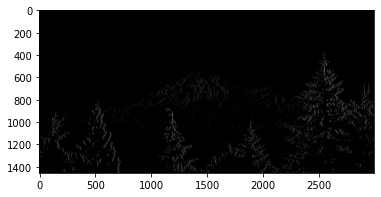

In [9]:
image = mx.image.imread('mt_baker.jpg',0).astype('float32')
image_channel_first= image.transpose((2,0,1))
image_batchified = image_channel_first.expand_dims(axis=0)
output = layer(image_batchified)
o=plt.imshow(output.squeeze().asnumpy(),cmap='gray')

In [11]:
layer.collect_params()

conv_ (
  Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter conv_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)

In [15]:
layer.collect_params()['conv_weight']

Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [16]:
layer.weight

Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [17]:
layer.weight.data()


[[[[-1.  0.  1.]
   [-2.  0.  2.]
   [-1.  0.  1.]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [18]:
layer.bias.data()


[0.]
<NDArray 1 @cpu(0)>

In [26]:
layer = nn.MaxPool2D(pool_size=(4,4))
layer

MaxPool2D(size=(4, 4), stride=(4, 4), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)

In [0]:
pooled = layer(output)

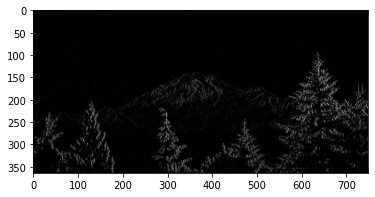

In [28]:
o=plt.imshow(pooled.squeeze().asnumpy(),cmap='gray')

In [29]:
layer.collect_params()

pool2_ (

)

In [31]:
layer = nn.Dense(units=10, in_units=3, activation='relu')
layer

Dense(3 -> 10, Activation(relu))

In [0]:
layer.initialize(mx.init.One())

In [33]:
inputs = mx.nd.ones((1,3))
inputs, layer(inputs)

(
 [[1. 1. 1.]]
 <NDArray 1x3 @cpu(0)>, 
 [[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]
 <NDArray 1x10 @cpu(0)>)

In [34]:
layer.weight.data()


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
<NDArray 10x3 @cpu(0)>

In [35]:
layer.bias.data()


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<NDArray 10 @cpu(0)>